In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [ ]:
null_rows = df.loc[pd.isna(df['Sleep Disorder'])]
null_rows['Sleep Disorder']

0      NaN
1      NaN
2      NaN
7      NaN
8      NaN
      ... 
341    NaN
342    NaN
343    NaN
358    NaN
359    NaN
Name: Sleep Disorder, Length: 219, dtype: object

In [ ]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
df = df.fillna('Nothing')

In [ ]:
df.loc[df['BMI Category'] == 'Normal Weight', 'BMI Category'] = 'Normal'

In [ ]:
duplic_rows = df[df.duplicated(subset=['Person ID', 'Gender'])]
print('Duplicated rows Based on ID and Gender')
print(duplic_rows)

Duplicated rows Based on ID and Gender
Empty DataFrame
Columns: [Person ID, Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps, Sleep Disorder]
Index: []


In [ ]:
n_duplicate = df.duplicated(subset=['Person ID', 'Gender'])
n_duplicate.any()

False

                         unique count
Person ID                         374
Gender                              2
Age                                31
Occupation                         11
Sleep Duration                     27
Quality of Sleep                    6
Physical Activity Level            16
Stress Level                        6
BMI Category                        3
Blood Pressure                     25
Heart Rate                         19
Daily Steps                        20
Sleep Disorder                      3


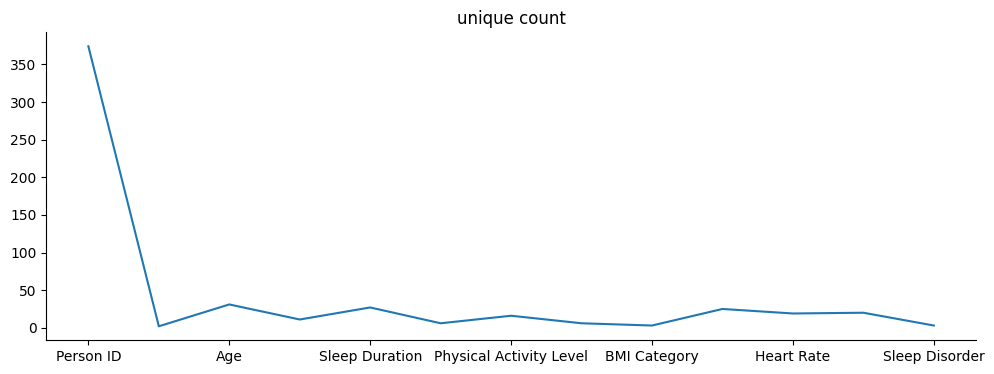

In [ ]:
unique_counts = {col: df[col].nunique() for col in df.columns}
result_un = pd.DataFrame(unique_counts, index=['unique count']).transpose()
print(result_un)

# Visualizing the unique counts
from matplotlib import pyplot as plt
result_un['unique count'].plot(kind='line', figsize=(12, 4), title='unique count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Nothing
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Nothing
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Nothing
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Software Engineer'),
  Text(1, 0, 'Doctor'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Teacher'),
  Text(4, 0, 'Nurse'),
  Text(5, 0, 'Engineer'),
  Text(6, 0, 'Accountant'),
  Text(7, 0, 'Scientist'),
  Text(8, 0, 'Lawyer'),
  Text(9, 0, 'Salesperson'),
  Text(10, 0, 'Manager')])

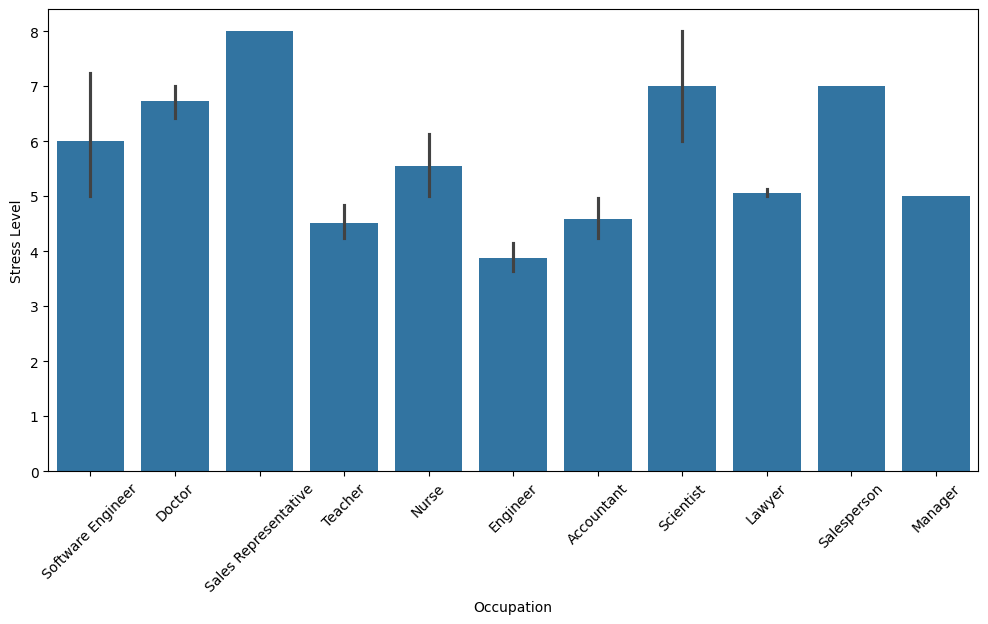

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Occupation', y='Stress Level', data=df)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Software Engineer'),
  Text(1, 0, 'Doctor'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Teacher'),
  Text(4, 0, 'Nurse'),
  Text(5, 0, 'Engineer'),
  Text(6, 0, 'Accountant'),
  Text(7, 0, 'Scientist'),
  Text(8, 0, 'Lawyer'),
  Text(9, 0, 'Salesperson'),
  Text(10, 0, 'Manager')])

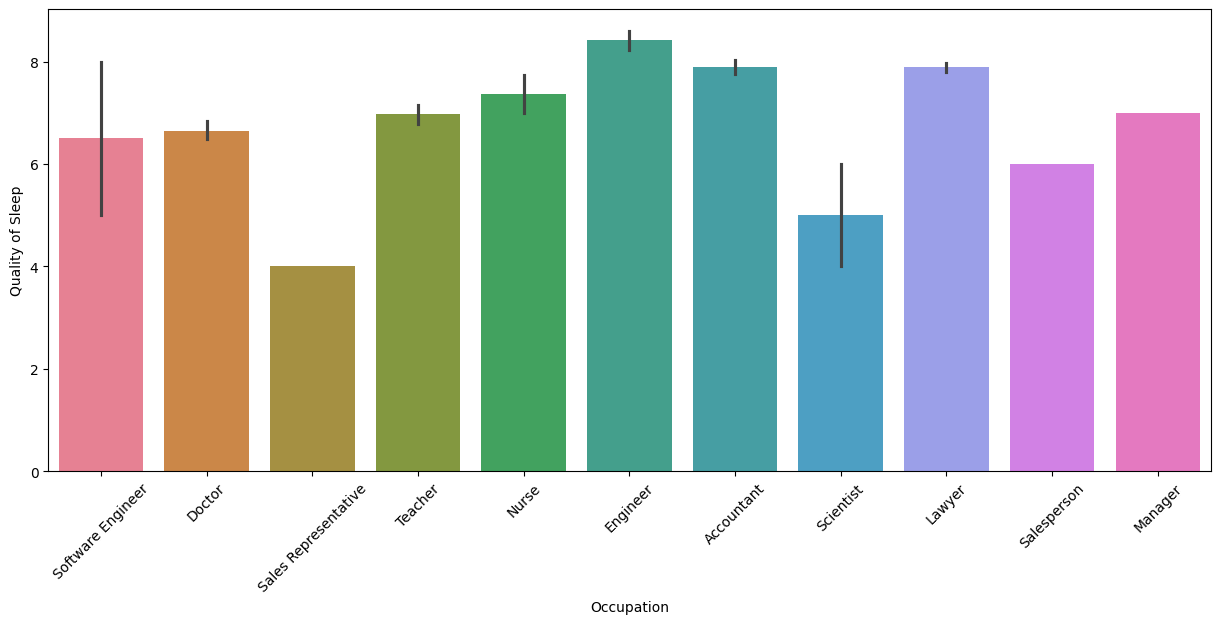

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Occupation', y='Quality of Sleep', data=df, hue='Occupation')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Software Engineer'),
  Text(1, 0, 'Doctor'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Teacher'),
  Text(4, 0, 'Nurse'),
  Text(5, 0, 'Engineer'),
  Text(6, 0, 'Accountant'),
  Text(7, 0, 'Scientist'),
  Text(8, 0, 'Lawyer'),
  Text(9, 0, 'Salesperson'),
  Text(10, 0, 'Manager')])

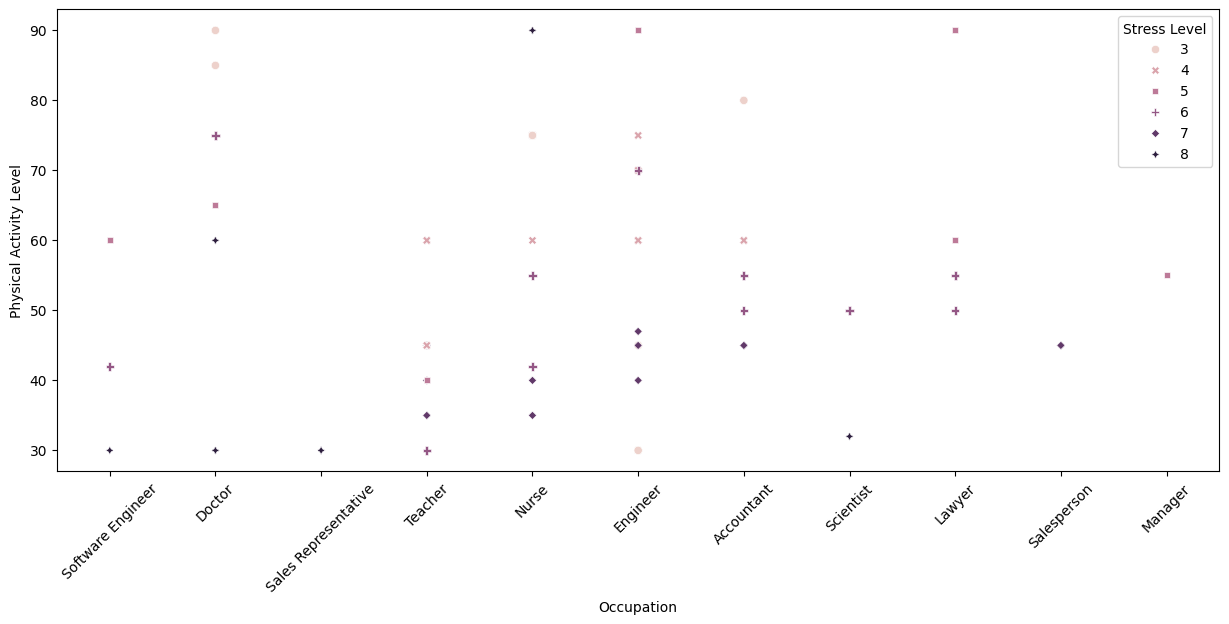

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Occupation', y='Physical Activity Level', data=df, hue='Stress Level', style='Stress Level')
plt.xticks(rotation=45)

<Axes: xlabel='Sleep Duration', ylabel='Physical Activity Level'>

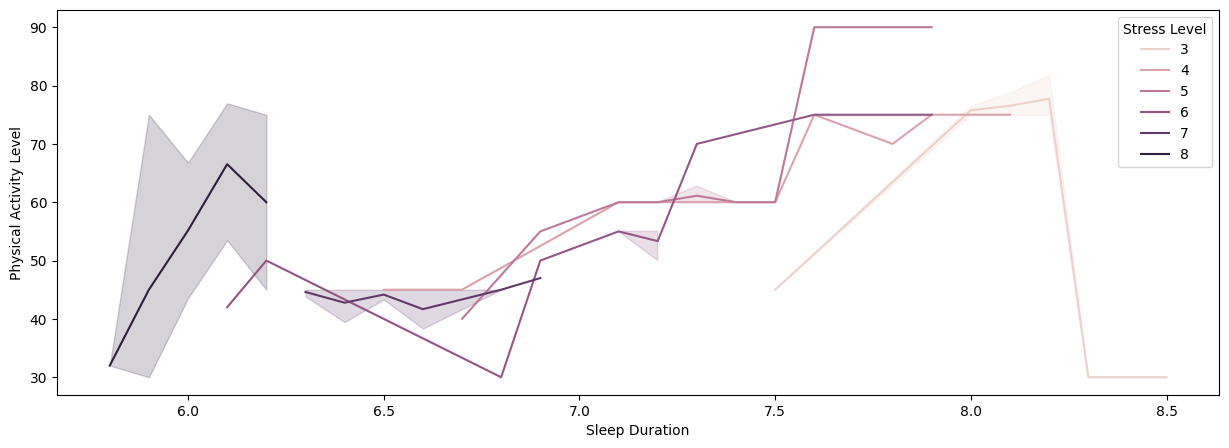

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='Sleep Duration', y='Physical Activity Level', data=df, hue='Stress Level')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Software Engineer'),
  Text(1, 0, 'Doctor'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Teacher'),
  Text(4, 0, 'Nurse'),
  Text(5, 0, 'Engineer'),
  Text(6, 0, 'Accountant'),
  Text(7, 0, 'Scientist'),
  Text(8, 0, 'Lawyer'),
  Text(9, 0, 'Salesperson'),
  Text(10, 0, 'Manager')])

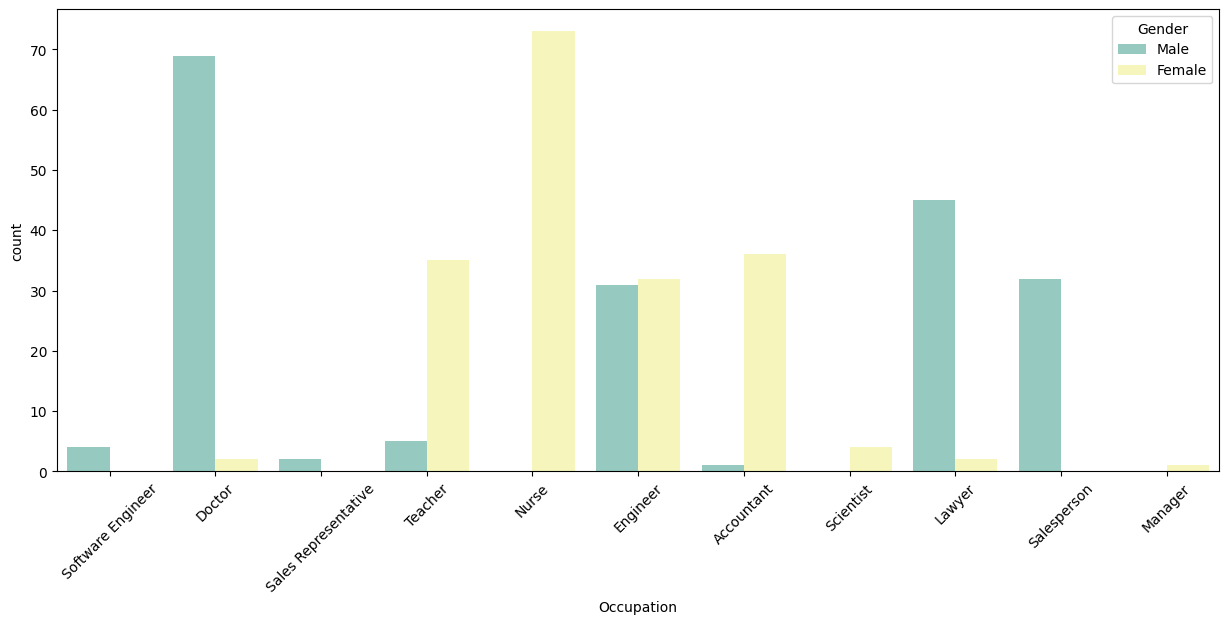

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Occupation', data=df, hue='Gender', palette='Set3')
plt.xticks(rotation=45)

In [ ]:
df.head(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Nothing
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Nothing


In [ ]:
# Encodeing Categorical Variabel---
from sklearn.preprocessing import LabelEncoder
lab_en = LabelEncoder()
categorical_col = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
df[categorical_col] = df[categorical_col].apply(lambda x: lab_en.fit_transform(x))

In [ ]:
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True)

df[['Systolic BP', 'Diastolic BP']] = df[['Systolic BP', 'Diastolic BP']].apply(pd.to_numeric)

df.drop(columns=['Blood Pressure'], inplace=True)

In [ ]:
df.drop(columns=['Person ID'], inplace=True)

In [ ]:
column_to_move = df.pop('Stress Level')
df['Stress Level'] = column_to_move

In [ ]:
rgb_colors = ['rgb(255, 215, 5)', 'rgb(255, 99, 81)', 'rgb(70, 130, 130)']
fig = go.Figure()

for i, color in enumerate(rgb_colors):
  fig.add_trace(go.Violin(x=df['Heart Rate'], y=df['Stress Level'],
                          line_color=color, name=f"{i+1}"))

fig.update_layout(title='Distribution of Stress by heart Rate',
                  xaxis_title='Heart Rate', yaxis_title='Stress Level',
                  width=800, height=600)
fig.show()

<ipython-input-59-1bfd5cbf2f55>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Occupation', ylabel='Stress Level'>

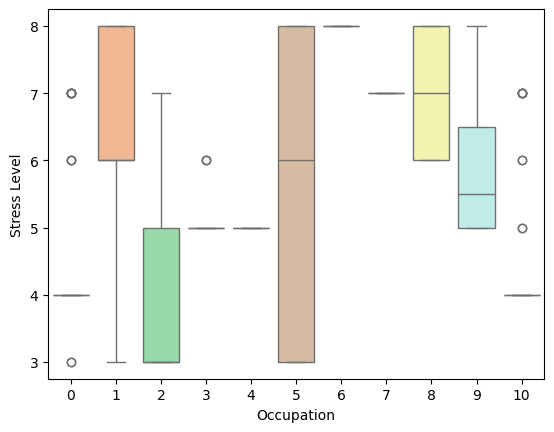

In [ ]:
sns.boxplot(x='Occupation', y='Stress Level', data=df, palette='pastel')

In [ ]:
fig = px.pie(df['Occupation'].value_counts(),
              names=df['Occupation'].value_counts().index,
              title='Distribution of Occupation', width=600, height=500)
fig.show()

In [ ]:
corr_matrix = df.corr()

fig = px.imshow(corr_matrix, x=corr_matrix.columns, y=corr_matrix.index,
                color_continuous_scale='plasma', title='CORR MATRIX',
                labels=dict(color='Correlation', x='Features', y='Features'), height=800, width=1000)

for i in range(len(corr_matrix.index)):
  for j in range(len(corr_matrix.columns)):
    fig.add_annotation(x=corr_matrix.columns[j], y=corr_matrix.index[i],
                       text=f'{corr_matrix.iloc[i, j]: .2f}',
                       showarrow=False, font=dict(color='black'))
fig.show()

In [ ]:
df.drop('Diastolic BP', axis=1, inplace=True)
df.drop('Sleep Disorder', axis=1, inplace=True)
df.drop('Quality of Sleep', axis=1, inplace=True)
df.drop('Physical Activity Level', axis=1, inplace=True)

corr_matrix = df.corr()

fig = px.imshow(corr_matrix, x=corr_matrix.columns, y=corr_matrix.index,
                color_continuous_scale='plasma', title='CORR UPDATE MATRIX',
                labels=dict(color='Correlation', x='FEATURES', y='FEATURES'), width=1000, height=800)

for i in range(len(corr_matrix.index)):
  for j in range(len(corr_matrix.columns)):
    fig.add_annotation(x=corr_matrix.columns[j], y=corr_matrix.index[i],
                       text=f'{corr_matrix.iloc[i, j]: .2f}',
                       showarrow=False, font=dict(color='black'))
fig.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


X = df.drop('Stress Level', axis=1)
y = df['Stress Level']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipelines = {
    'Logestic Regression': Pipeline([('scale', StandardScaler()), ('clf', LogisticRegression())]),
    'SVC': Pipeline([('scale', StandardScaler()), ('clf', SVC())]),
    'Decision Tree': Pipeline([('scale', StandardScaler()), ('clf', DecisionTreeClassifier())]),
    'Random Forest': Pipeline([('scale', StandardScaler()), ('clf', RandomForestClassifier())])
}


result = {}
for name, pipe in pipelines.items():
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  result[name] = accuracy

for name, accuracy in result.items():
  print(f'{name}: {accuracy}')

Logestic Regression: 0.8933333333333333
SVC: 0.8933333333333333
Decision Tree: 0.9733333333333334
Random Forest: 0.9866666666666667


In [ ]:
logis = LogisticRegression(max)
logis.fit(X_train, y_train)
l_pred = logis.predict(X_test)
accuraccy = accuracy_score(y_test, l_pred)
print(accuraccy)

0.92


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# @title Sleep Disorder Prevalence by Age Group

df.groupby(['Age', 'Sleep Disorder']).size().unstack().plot(kind='bar')